# The Star Wars graph

In [1]:
import io
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
INPUT_GRAPH_FILENAME = "./Downloads/networks-science-course/practicum/data/starwars.graphml"

In [3]:
# Read the graph in GraphML format
g_in = nx.read_graphml(INPUT_GRAPH_FILENAME)
g_raw = g_in.copy()

# Re-label the nodes so they use the 'name' as label
g_relabeled = nx.relabel.relabel_nodes(g_in, dict(g_raw.nodes(data='name')))

# Convert the graph to undirected
g = g_relabeled.to_undirected()

In [4]:
def plotgraph(g):
    # Create a plot of 20x10
    plt.figure(figsize=(20,10))

    # Layout the nodes using a spring model
    nx.draw_spring(g, with_labels=True)

    # Display
    _ = plt.show()

/Users/namjoolee/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


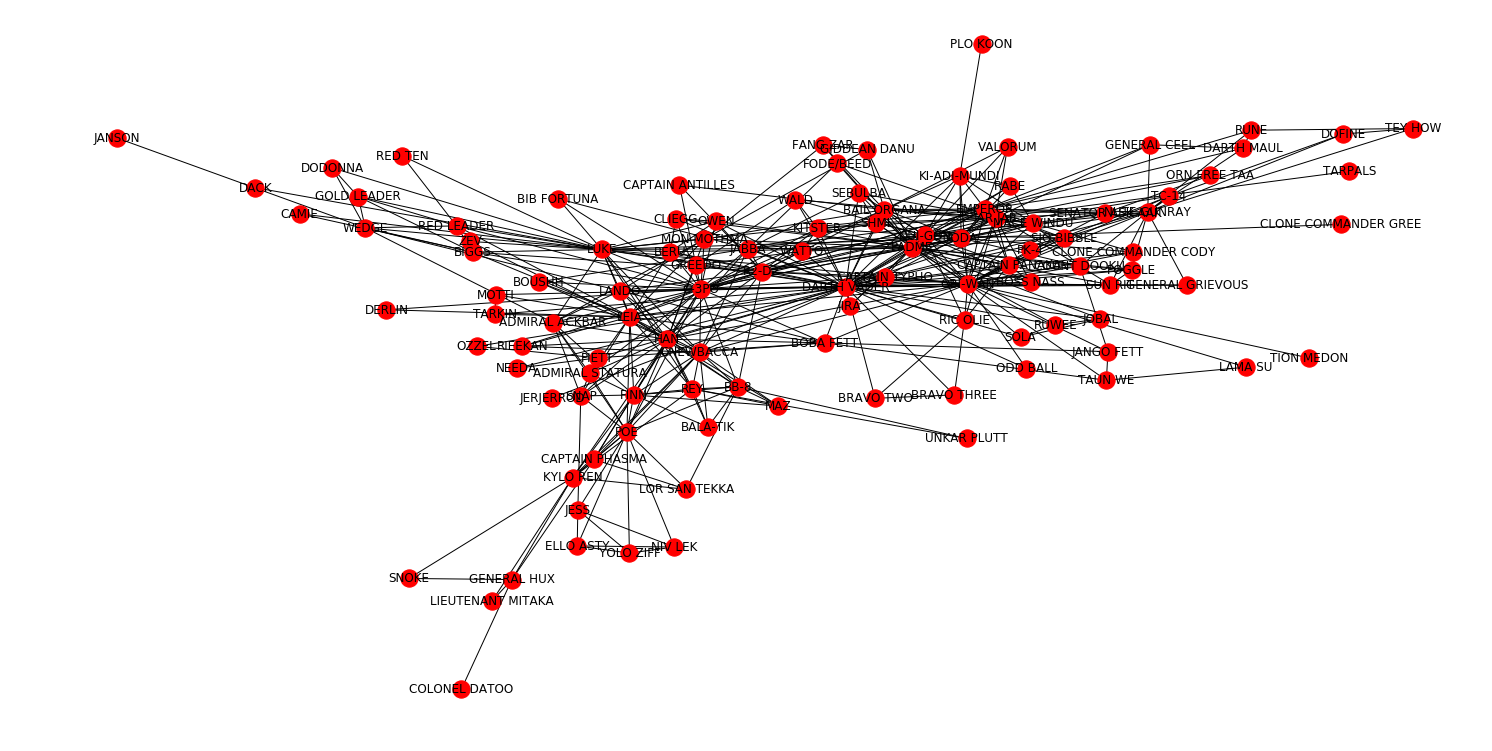

In [5]:
plotgraph(g)

# Removing a fraction of edges

In [6]:
def remove_fraction_edges(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError
    
    # Create a copy of the input graph
    g_out = g_in.copy()
    
    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:
        
        # Remove one random edge
        edge = random.choice(list(g_out.edges()))
        g_out.remove_edge(edge[0], edge[1])
    
    # Return the resulting graph
    return g_out

g10


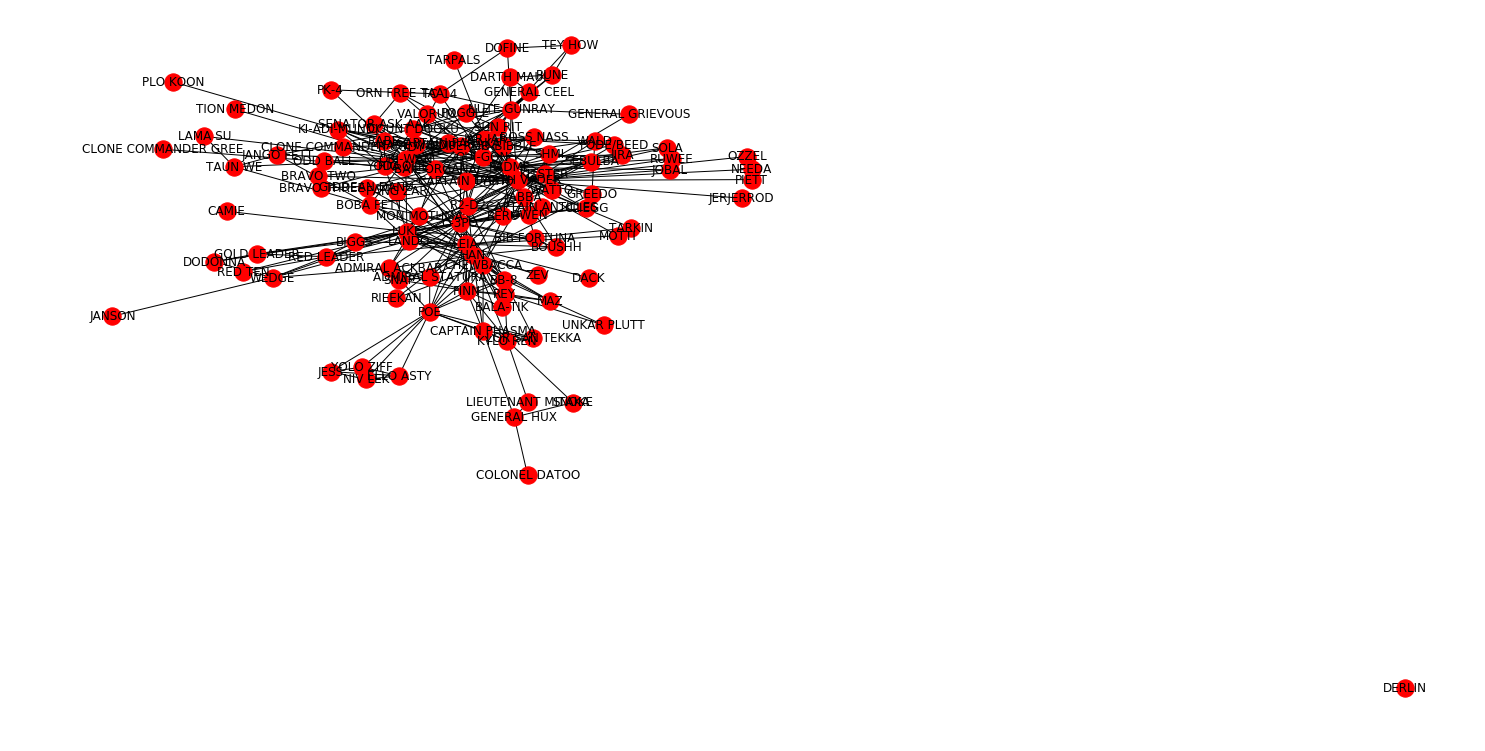

g50


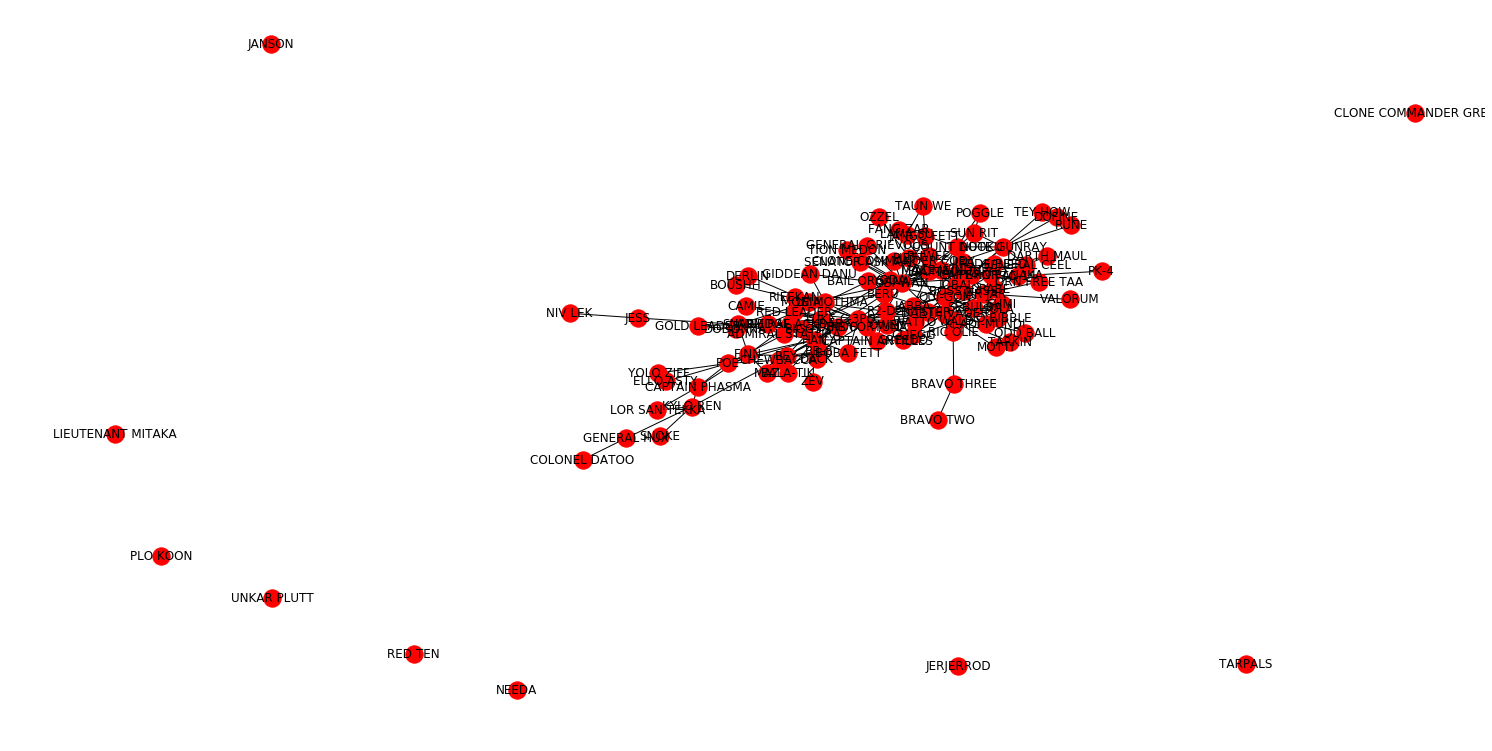

g90


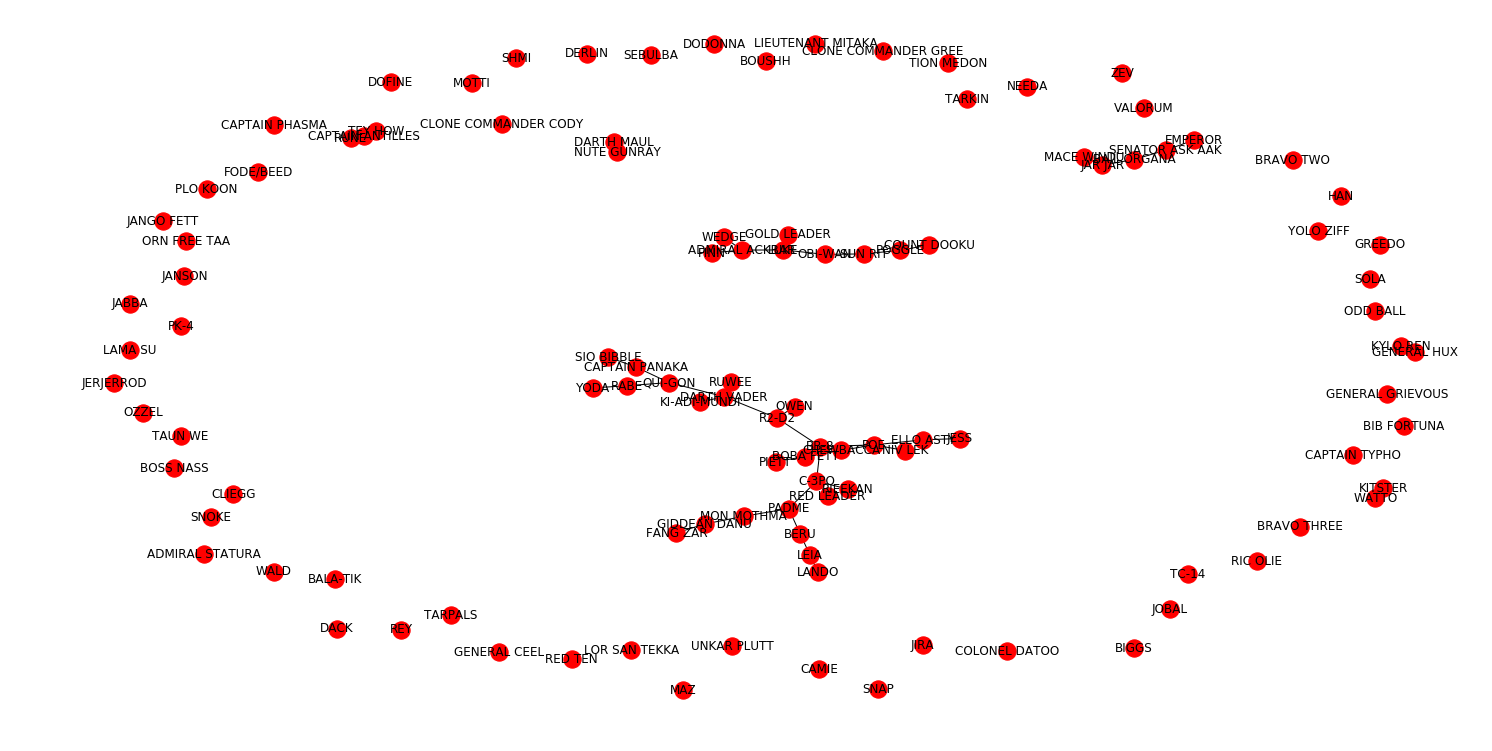

In [7]:
# Create g10, g50, g90
g10 = remove_fraction_edges(g, 0.1)
g50 = remove_fraction_edges(g, 0.5)
g90 = remove_fraction_edges(g, 0.9)

print("g10")
plotgraph(g10)
print("=" * 75)
print("g50")
plotgraph(g50)
print("=" * 75)
print("g90")
plotgraph(g90)
print("=" * 75)

# Number of connected components

In [8]:
def assign_component(g):
    node2componentid = dict()
    component_id = 1
    for node in g.nodes():
        if node not in node2componentid.keys():
            assign_component_recursive(g, node2componentid, node, component_id)
            component_id += 1
    return node2componentid

In [9]:
def assign_component_recursive(g, node2componentid, starting_node, component_id):
    node2componentid[starting_node] = component_id
    for neighbor in g.neighbors(starting_node):
        if neighbor not in node2componentid.keys():
            assign_component_recursive(g, node2componentid, neighbor, component_id)


In [10]:
def count_connected_components(g):
    # Call the function to assign each node to a connected component
    node2componentid = assign_component(g)
    
    # Count the number of distinct values in this assignment
    return len(set(node2componentid.values()))

In [11]:
components_per_fraction = {}

for p in np.arange(0.0, 1.02, 0.02):
    reduced_graph = remove_fraction_edges(g, p)
    connected_components = count_connected_components(reduced_graph)
    components_per_fraction[p] = connected_components

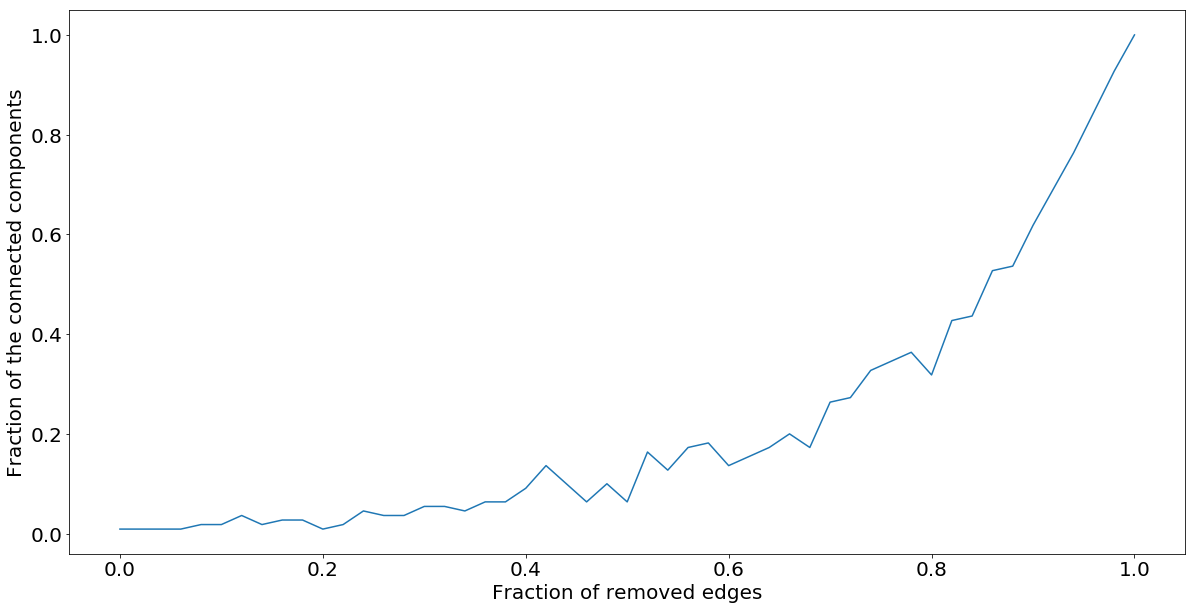

In [12]:
x_vals = sorted(components_per_fraction.keys())
y_vals = [components_per_fraction[x]/g.number_of_nodes() for x in x_vals]

plt.figure(figsize=(20,10))
plt.plot(x_vals, y_vals)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Fraction of removed edges", fontsize=20)
plt.ylabel("Fraction of the connected components", fontsize=20)

plt.show()

# Largest connected component

In [13]:
def largest_connected_component(g):
    node2componentid = assign_component(g)
    component_sizes = {}
    for (node,componentid) in node2componentid.items():
        if componentid not in component_sizes:
            component_sizes[componentid] = 0
        component_sizes[componentid] += 1
    
    return np.max(list(component_sizes.values()))

In [14]:
components_per_fraction = {}

for p in np.arange(0.0, 1.02, 0.02):
    reduced_graph = remove_fraction_edges(g, p)
    lcc = largest_connected_component(reduced_graph)
    components_per_fraction[p] = lcc

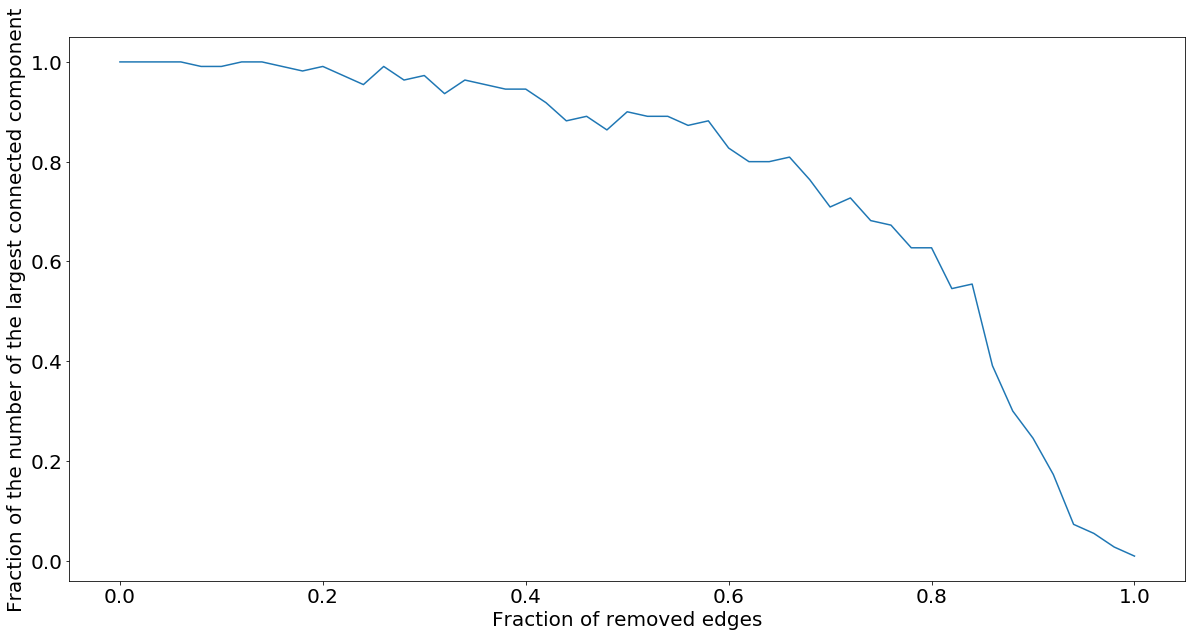

In [15]:
x_vals = sorted(components_per_fraction.keys())
y_vals = [components_per_fraction[x]/g.number_of_nodes() for x in x_vals]

plt.figure(figsize=(20,10))
plt.plot(x_vals, y_vals)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Fraction of removed edges", fontsize=20)
plt.ylabel("Fraction of the number of the largest connected component", fontsize=20)

plt.show()

# K-core decomposition

In [16]:
def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

In [24]:
def kcore_decomposition(graph):
    ''' Perform a k-core decomposition of the given graph
    '''
    g = graph.copy()
    max_degree = get_max_degree(g)

    node_to_level = {}
    for level in range(0, max_degree + 1):

        while True:
            # Obtain the list of nodes with degree <= level
            nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)

            # Check if this list is empty
            if len(nodes_in_level) == 0:
                break

            # If the list is not empty, assign the nodes to the
            # corresponding level and remove the node
            for node in nodes_in_level:
                node_to_level[node] = level
                g.remove_node(node)

    return node_to_level

In [25]:
# Check whether the implementation is correct

graph_list = [g, g10, g50, g90]
for graph in graph_list:
    node_to_kcore = kcore_decomposition(graph)
    print("=" * 50)
    print(node_to_kcore == nx.core_number(graph))

True
True
True
True


In [19]:
kcore_decomposition(g)

{'COLONEL DATOO': 1,
 'JANSON': 1,
 'DACK': 1,
 'TION MEDON': 1,
 'CLONE COMMANDER GREE': 1,
 'PLO KOON': 1,
 'TARPALS': 1,
 'JERJERROD': 1,
 'SNOKE': 2,
 'LIEUTENANT MITAKA': 2,
 'ZEV': 2,
 'DERLIN': 2,
 'RED TEN': 2,
 'CAMIE': 2,
 'LAMA SU': 2,
 'PK-4': 2,
 'UNKAR PLUTT': 2,
 'NEEDA': 2,
 'OZZEL': 2,
 'ODD BALL': 2,
 'GENERAL HUX': 2,
 'PIETT': 2,
 'BIB FORTUNA': 3,
 'DODONNA': 3,
 'TAUN WE': 3,
 'ORN FREE TAA': 3,
 'FODE/BEED': 3,
 'TEY HOW': 3,
 'DOFINE': 3,
 'CAPTAIN ANTILLES': 3,
 'TARKIN': 3,
 'MOTTI': 3,
 'GENERAL GRIEVOUS': 3,
 'BRAVO THREE': 3,
 'BRAVO TWO': 3,
 'JIRA': 3,
 'JANGO FETT': 3,
 'RUNE': 3,
 'TC-14': 3,
 'DARTH MAUL': 3,
 'GENERAL CEEL': 3,
 'YOLO ZIFF': 4,
 'NIV LEK': 4,
 'ELLO ASTY': 4,
 'BOUSHH': 4,
 'GOLD LEADER': 4,
 'GIDDEAN DANU': 4,
 'FANG ZAR': 4,
 'VALORUM': 4,
 'LOR SAN TEKKA': 4,
 'RIEEKAN': 4,
 'CLONE COMMANDER CODY': 4,
 'RUWEE': 4,
 'JOBAL': 4,
 'SOLA': 4,
 'GREEDO': 4,
 'JESS': 4,
 'WALD': 4,
 'RED LEADER': 5,
 'WEDGE': 5,
 'CAPTAIN PHASMA': 5,
 'M

/Users/namjoolee/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


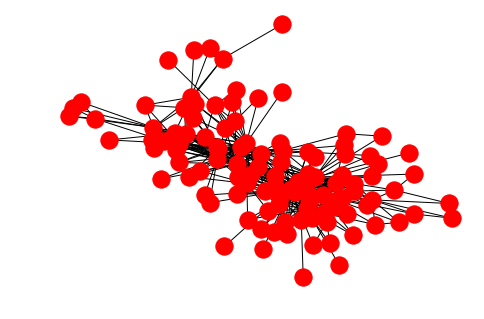

In [20]:
nx.draw(g)

/Users/namjoolee/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


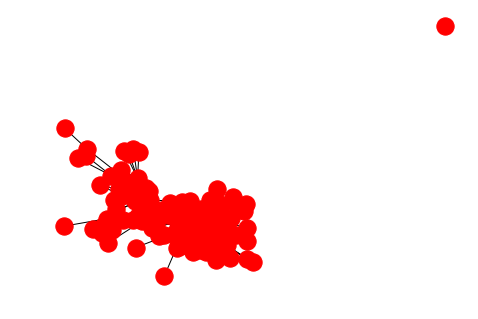

In [21]:
nx.draw(g10)